<a href="https://colab.research.google.com/github/shashwat1998/YOLOv5/blob/master/YOLOv5_SoccerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Isabek/XmlToTxt
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/shashwat1998/YOLOv5

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 50 (delta 1), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (50/50), done.
Cloning into 'yolov5'...
remote: Enumerating objects: 909, done.
remote: Total 909 (delta 0), reused 0 (delta 0), pack-reused 909
Receiving objects: 100% (909/909), 3.39 MiB | 22.51 MiB/s, done.
Resolving deltas: 100% (602/602), done.
Cloning into 'YOLOv5'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 397 (delta 190), reused 391 (delta 189), pack-reused 0
Receiving objects: 100% (397/397), 418.00 MiB | 45.04 MiB/s, done.
Resolving deltas: 100% (190/190), done.
Checking out files: 100% (469/469), done.


In [1]:
%cd yolov5
!pip install -U -r requirements.txt
%cd ..

/content/yolov5
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-96l55kk3
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-96l55kk3
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 2)) (0.29.20)
Requirement already up-to-date: numpy==1.17 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 3)) (1.17.0)
Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (4.2.0.34)
Requirement already up-to-date: torch>=1.4 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (1.5.1+cu101)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 6)) (3.2.2)
Requirement already up-to-date: pillow in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (7.2.0)
Requirement alre

In [2]:
%cd XmlToTxt
!pip install -U -r requirements.txt
%cd ..

/content/XmlToTxt
/content


In [4]:
!cp -rf XmlToTxt/* ./

In [5]:
!cp -rf YOLOv5/* ./

In [7]:
!python xmltotxt.py -xml labels/val -out labels/val1

In [8]:
!python xmltotxt.py -xml labels/train -out labels/train1

In [9]:
!rm -rf labels/train
!rm -rf labels/val

In [ ]:
!mv labels/val1 labels/val
!mv labels/train labels/train

In [17]:
!mkdir -p soccer

In [18]:
!cp -rf images ./soccer/images/

In [19]:
!cp -rf labels ./soccer/labels/

In [20]:
%cd yolov5/

/content/yolov5


In [21]:
!python train.py --batch 16 --epochs 5 --data ./data/soccer.yaml --cfg ./models/yolov5s.yaml --weights ''

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/soccer.yaml', device='', epochs=5, evolve=False, img_size=[640, 640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CPU

2020-07-02 07:32:14.397765: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

              from  n    params  module                                  argumen

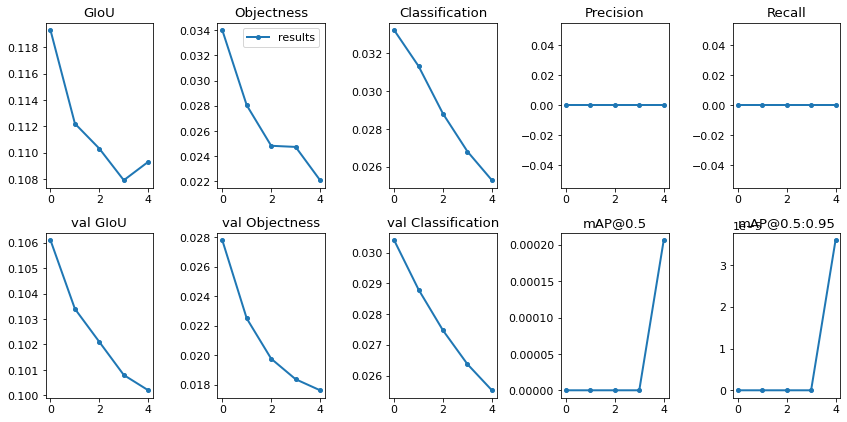

In [22]:
from utils.utils import plot_results
plot_results()